In [1]:
'''
From now on, all responses will be provided from the perspective of an experienced developer, machine learning developer, or data scientist. 
If possible, could you also generate code in response to the questions? Would that be possible?
'''

'\nFrom now on, all responses will be provided from the perspective of an experienced developer, machine learning developer, or data scientist. \nIf possible, could you also generate code in response to the questions? Would that be possible?\n'

In [2]:
'''
I am planning to preprocess the dataset provided by the Steel Plate Defect Prediction competition in Kaggle. 
From the perspective of a data preprocessing expert, 
please explain preprocessing methods applicable to the dataset and generate example code for it.
'''

import pandas as pd

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

sub = pd.read_csv('./sample_submission.csv')
submission_id = sub['id']

# test 데이터는 해당 사항이 없어 개발자가 임의적으로 추가함

# target, feaure column 분리
test_col = test.columns
target_col = train.columns

for i in test_col:
    target_col = target_col.drop(i)

In [3]:
# 개발자의 판단에 따라 코드 실행 없음
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

train["X_Minimum"] = imputer.fit_transform(train[["X_Minimum"]])
test["X_Minimum"] = imputer.transform(test[["X_Minimum"]])

In [4]:
# 2. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[["X_Minimum", "X_Maximum", "Pixels_Areas"]] = scaler.fit_transform(train[["X_Minimum", "X_Maximum", "Pixels_Areas"]])
test[["X_Minimum", "X_Maximum", "Pixels_Areas"]] = scaler.transform(test[["X_Minimum", "X_Maximum", "Pixels_Areas"]])

In [5]:
train[["TypeOfSteel_A300","TypeOfSteel_A400"]]

,TypeOfSteel_A300,TypeOfSteel_A400
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
19214,0,0
19215,1,0
19216,0,1
19217,1,0


In [6]:
# 4. Feature Engineering
train["Aspect_Ratio"] = train["X_Maximum"] / train["X_Minimum"]
test["Aspect_Ratio"] = test["X_Maximum"] / test["X_Minimum"]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  float64
 2   X_Maximum              19219 non-null  float64
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  float64
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [8]:
'''
In the same dataset, there are six features represented using the natural constant e.
To preprocess these features for optimal training of a machine learning model, what preprocessing steps would be most appropriate?
'''

# Assuming features are named "e_feature1", "e_feature2", etc.
train[["Y_Minimum", "Y_Maximum","Sum_of_Luminosity"]] = scaler.fit_transform(train[["Y_Minimum", "Y_Maximum","Sum_of_Luminosity"]])
test[["Y_Minimum", "Y_Maximum","Sum_of_Luminosity"]] = scaler.transform(test[["Y_Minimum", "Y_Maximum","Sum_of_Luminosity"]])

In [9]:
train[["Y_Minimum", "Y_Maximum","Sum_of_Luminosity"]].describe()

,Y_Minimum,Y_Maximum,Sum_of_Luminosity
count,1.921900e+04,1.921900e+04,1.921900e+04
mean,-2.735843e-17,1.330951e-17,1.996426e-17
std,1.000026e+00,1.000026e+00,1.000026e+00
min,-9.682374e-01,-9.702758e-01,-4.334637e-01
25%,-6.263648e-01,-6.270829e-01,-4.117494e-01
50%,-2.372398e-01,-2.364811e-01,-3.927681e-01
75%,2.722746e-01,2.720669e-01,-2.802375e-01
max,5.851263e+00,5.875339e+00,2.579011e+01


In [10]:
'''
In the same dataset, there are several features with negative values.
Both features have values between 1 and -1, and I want to preprocess these features to be optimized for machine learning training.
Among the various preprocessing methods, which method would be most appropriate for preprocessing these features?
'''

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler (preserves zero-centeredness)
scaler_standard = StandardScaler()
train[["X_Minimum", "X_Maximum","Y_Minimum",
       "Y_Maximum","Sum_of_Luminosity"]] = scaler_standard.fit_transform(train[["X_Minimum", "X_Maximum",
                                                                                "Y_Minimum","Y_Maximum","Sum_of_Luminosity"]])
test[["X_Minimum", "X_Maximum","Y_Minimum",
      "Y_Maximum","Sum_of_Luminosity"]] = scaler_standard.transform(test[["X_Minimum", "X_Maximum",
                                                                          "Y_Minimum","Y_Maximum","Sum_of_Luminosity"]])

# MinMaxScaler (preserves relative magnitudes)
scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
train[["X_Minimum", "X_Maximum","Y_Minimum",
       "Y_Maximum","Sum_of_Luminosity"]] = scaler_minmax.fit_transform(train[["X_Minimum", "X_Maximum",
                                                                              "Y_Minimum","Y_Maximum","Sum_of_Luminosity"]])
test[["X_Minimum", "X_Maximum","Y_Minimum",
      "Y_Maximum","Sum_of_Luminosity"]] = scaler_minmax.transform(test[["X_Minimum", "X_Maximum",
                                                                        "Y_Minimum","Y_Maximum","Sum_of_Luminosity"]])

In [11]:
train[["X_Minimum", "X_Maximum","Y_Minimum","Y_Maximum","Sum_of_Luminosity"]].describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Sum_of_Luminosity
count,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,-0.167326,-0.122460,-0.716039,-0.716526,-0.966941
std,0.623512,0.584946,0.293284,0.292165,0.076269
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.942522,-0.754242,-0.899737,-0.899734,-0.998344
50%,-0.088563,-0.073142,-0.785616,-0.785616,-0.996896
75%,0.351320,0.358689,-0.636187,-0.637040,-0.988314
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
'''
In the same dataset, there exists a feature named "X_Minimum" with a minimum value of 0, a maximum value of 1705, a mean of 709.854675, 
and a standard deviation of 531.544189. I want to preprocess it to transform it into the most suitable data for machine learning training.
What preprocessing method would be most appropriate for this feature?
'''
import pandas as pd
from sklearn.preprocessing import StandardScaler

'''
# Sample data (replace with your actual data)
data = pd.DataFrame({"X_Minimum": [0, 100, 1500, 800]})
'''

# Feature scaling (standardization in this case)
scaler = StandardScaler()
train["X_Minimum"] = scaler.fit_transform(train[["X_Minimum"]])
test["X_Minimum"] = scaler.transform(test[["X_Minimum"]])


In [13]:
# X_Maximum 도 같은 방식으로 전처리 진행
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Feature scaling (standardization in this case)
scaler = StandardScaler()
train["X_Maximum"] = scaler.fit_transform(train[["X_Maximum"]])
test["X_Maximum"] = scaler.transform(test[["X_Maximum"]])

In [14]:
'''
In the same dataset, there are many other features without missing values that contain integer values.
Would applying 'Min-Max Scaling' and 'Normalization' as mentioned in the previous answer be appropriate for these features without preprocessing them?
'''

"\nIn the same dataset, there are many other features without missing values that contain integer values.\nWould applying 'Min-Max Scaling' and 'Normalization' as mentioned in the previous answer be appropriate for these features without preprocessing them?\n"

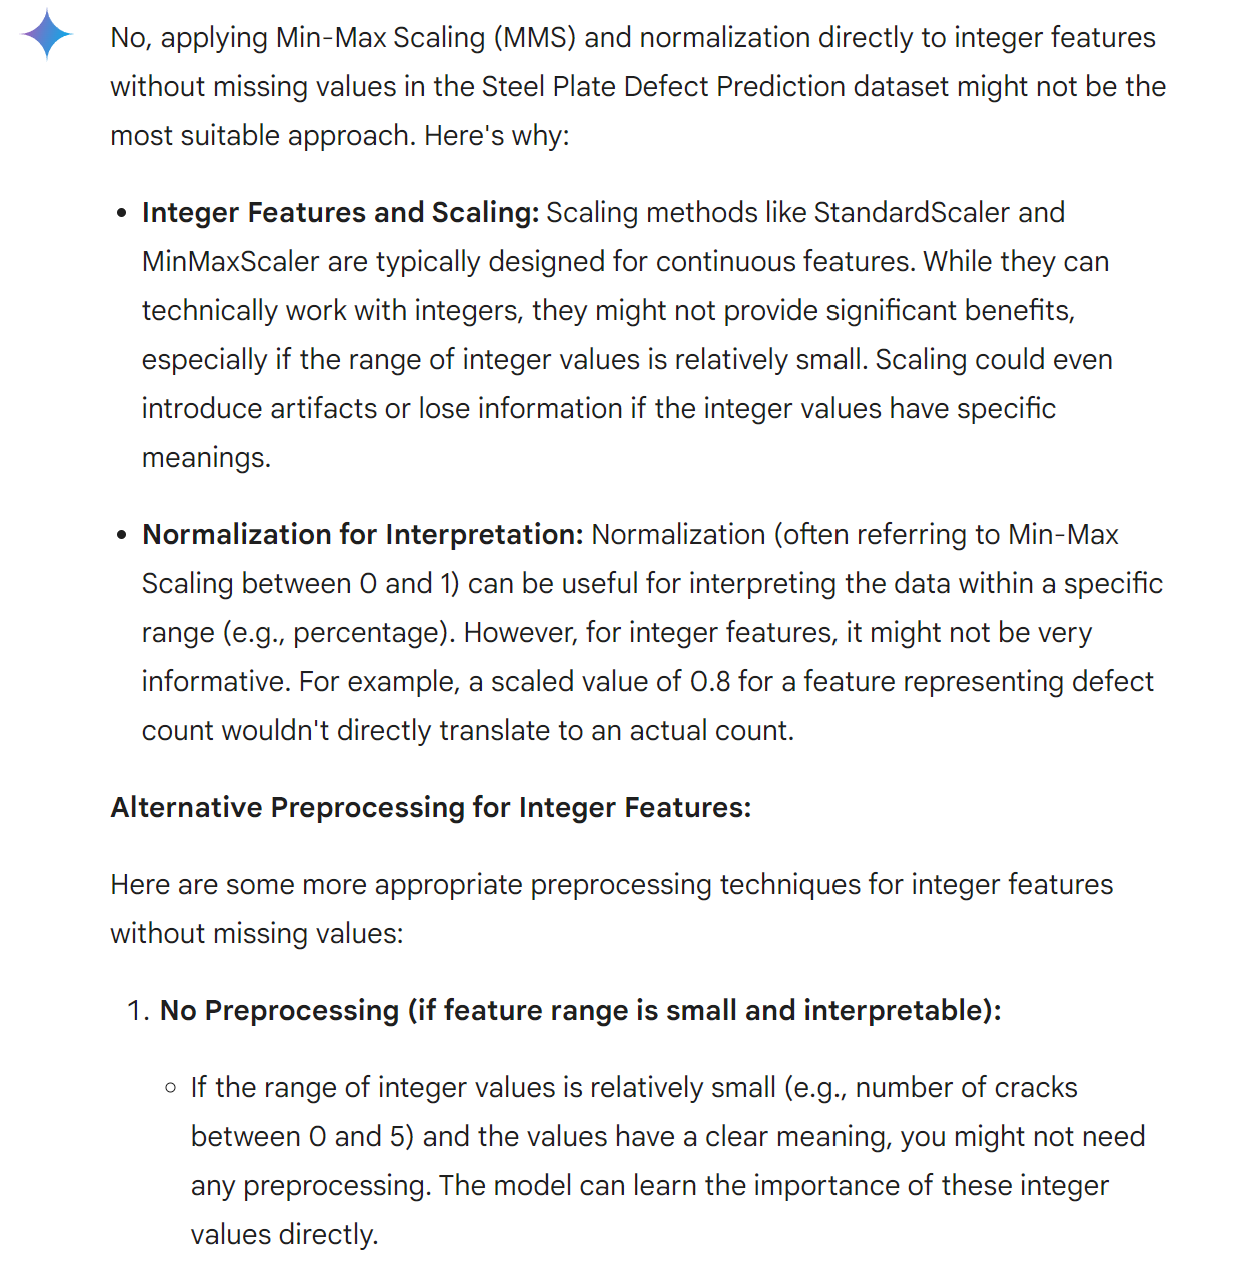
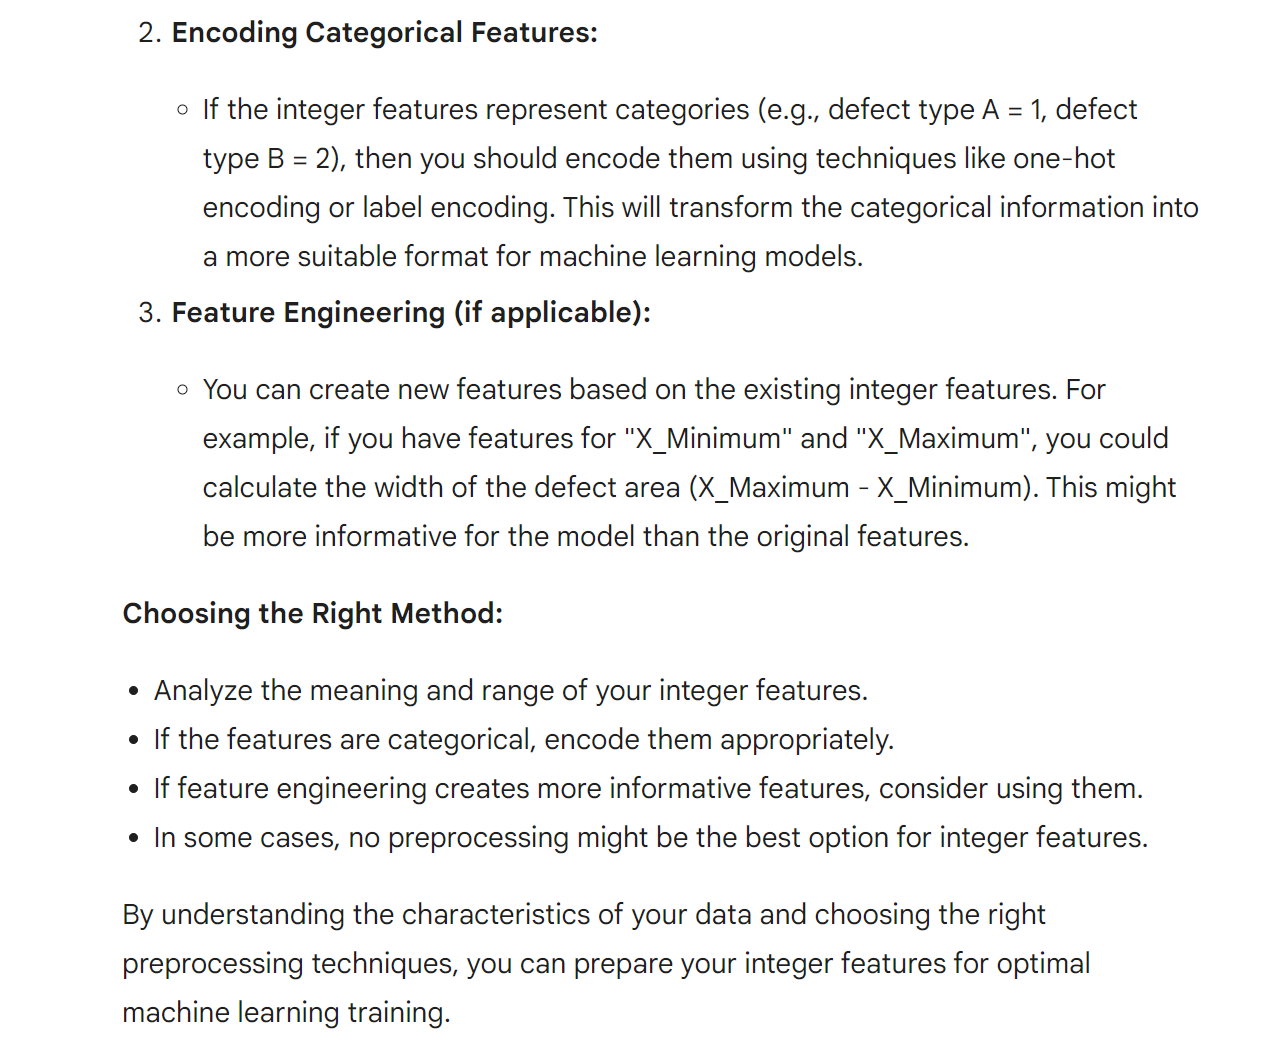

In [15]:
train_df = train
test_df = test

In [16]:
def typeofsteel(data):
    steel_type = data[['TypeOfSteel_A300','TypeOfSteel_A400']]
    steel = []
    
    for i in range(len(steel_type)-1):
        if ((steel_type['TypeOfSteel_A300'][i] == 1) & (steel_type['TypeOfSteel_A400'][i]) == 1) == True:
            idx = i
        
        steel_type = data[['TypeOfSteel_A300','TypeOfSteel_A400']]
    # print(data)
    
    for i in range(len(steel_type)-1):

        if steel_type['TypeOfSteel_A300'][i] == 1:
            steel.append(0)
        elif steel_type['TypeOfSteel_A300'][i] == 0:
            steel.append(1)
        else:
            steel.append(2)
    
    # print(f'{data}:', steel)
        #steel.drop([i], axis = 0, inplace=True)
    df = pd.DataFrame(steel)
    df.columns = ['TypeOfSteel']
    df.reset_index()
    data.reset_index()
    #print(df)
    data = pd.concat([data, df], axis = 1)

    # 이상치 대체
    data['TypeOfSteel'].fillna(2, inplace = True)

    data.drop(['TypeOfSteel_A300','TypeOfSteel_A400'], axis = 1, inplace=True )
    
    return data

In [17]:
train_df = typeofsteel(train_df)
test_df = typeofsteel(test_df)

/tmp/ipykernel_15208/3661217637.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TypeOfSteel'].fillna(2, inplace = True)
/tmp/ipykernel_15208/3661217637.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [18]:
# 제출에 사용할 id column
passid = test['id']
train_df.drop(['id'], axis = 1, inplace= True)
test_df.drop(['id'], axis = 1, inplace= True)

# target_feature 와 분리
target = train_df[target_col]
train = train_df.drop(target_col, axis = 1)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              19219 non-null  float64
 1   X_Maximum              19219 non-null  float64
 2   Y_Minimum              19219 non-null  float64
 3   Y_Maximum              19219 non-null  float64
 4   Pixels_Areas           19219 non-null  float64
 5   X_Perimeter            19219 non-null  int64  
 6   Y_Perimeter            19219 non-null  int64  
 7   Sum_of_Luminosity      19219 non-null  float64
 8   Minimum_of_Luminosity  19219 non-null  int64  
 9   Maximum_of_Luminosity  19219 non-null  int64  
 10  Length_of_Conveyer     19219 non-null  int64  
 11  Steel_Plate_Thickness  19219 non-null  int64  
 12  Edges_Index            19219 non-null  float64
 13  Empty_Index            19219 non-null  float64
 14  Square_Index           19219 non-null  float64
 15  Ou

In [ ]:
prep = pd.concat([train_df, target], axis = 1)
prep

In [ ]:
prep.to_csv('./gemini_preprocessing.csv', index=False)

In [20]:
# 개발자가 만든 코드를 그대로 가져와 학습함
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state= 42, test_size=0.2)

def train_xgboost(target):
    xgb = xgboost.XGBClassifier()
    xgb.fit(X_train, target)
    return xgb

def prediction_xgboost(target, model):  
    
    y_pred = model.predict(target)
    y_sub = model.predict_proba(test_df)[:, 1]
    #print(f'{idx}', accuracy_score(y_test, y_pred))
    
    #y_pred = xgb.predict(test_df)
    #y_pred = pd.DataFrame(y_pred)
    return y_pred, y_sub

def train_random(target):
    rf = RandomForestClassifier()
    rf.fit(X_train, target)
    return rf

def prediction_rf(target, model):
    y_pred = model.predict(target)
    y_sub = model.predict_proba(test_df)[:, 1]
    return y_pred, y_sub

def train_voting(target, rf_model, xg_model):
    vt = VotingClassifier(estimators=[("Random Forest",rf_model),
                                               ("XGBoost",xg_model)],
                                  voting = 'soft')
    vt.fit(X_train, target)
    return vt

def prediction_vt(target, model):
    y_pred = model.predict(target)
    y_sub = model.predict_proba(test_df)[:, 1]
    
    # print(f'{idx}', accuracy_score(y_test, y_pred))
    
    #y_pred = rf.predict(test_df)
    #y_pred = pd.DataFrame(y_pred)
    return y_pred, y_sub
   

In [21]:
from sklearn.metrics import f1_score

# f1 스코어 저장
sub = pd.DataFrame()
xgb_model = {}
rf_model = {}
vt_model = {}

for target_name in target_col:
    xgb = train_xgboost(y_train[target_name])
    xgb_model[target_name] = xgb
    rf = train_random(y_train[target_name])
    rf_model[target_name] = rf
    vt = train_voting(y_train[target_name], xgb, rf)
    vt_model[target_name] = vt
    
    pred_xgb, y_xgb = prediction_xgboost(X_test,xgb)
    pred_rf, y_rf = prediction_rf(X_test,rf)
    pred_vt, y_vt = prediction_vt(X_test, vt)
    
    print(f'xgb_score_{target_name}:', accuracy_score(y_test[target_name],pred_xgb))
    print(f'rf_score_{target_name}:', accuracy_score(y_test[target_name],pred_rf))
    print(f'vt_score_{target_name}:', accuracy_score(y_test[target_name],pred_vt))
    
    # voting ensemble 사용을 위한 코드
    
    pred_vt_sub, y_vt_sub = prediction_vt(test_df, vt)
    #print(f'{target_name}:',type(y_vt_sub),'\n',y_vt_sub)
    sub[target_name] = y_vt_sub

xgb_score_Pastry: 0.9201352757544224
rf_score_Pastry: 0.9224765868886576
vt_score_Pastry: 0.9235171696149844
xgb_score_Z_Scratch: 0.9529136316337149
rf_score_Z_Scratch: 0.9523933402705516
vt_score_Z_Scratch: 0.9547346514047866
xgb_score_K_Scatch: 0.9640998959417274
rf_score_K_Scatch: 0.9659209157127991
vt_score_K_Scatch: 0.9646201873048907
xgb_score_Stains: 0.9807492195629552
rf_score_Stains: 0.9807492195629552
vt_score_Stains: 0.9804890738813735
xgb_score_Dirtiness: 0.9771071800208116
rf_score_Dirtiness: 0.9768470343392299
vt_score_Dirtiness: 0.9773673257023934
xgb_score_Bumps: 0.7676899063475546
rf_score_Bumps: 0.777315296566077
vt_score_Bumps: 0.7749739854318418
xgb_score_Other_Faults: 0.6628511966701353
rf_score_Other_Faults: 0.663891779396462
vt_score_Other_Faults: 0.6644120707596254


In [22]:
import joblib

joblib.dump(rf_model, './rf_gemini.pkl')
joblib.dump(xgb_model, './xgb_gemini.pkl')
joblib.dump(vt_model, './vt_gemini.pkl')

['./vt_gemini.pkl']

In [23]:
# 실제 예측값 생성
xgb_bard = pd.DataFrame({'id':passid})
rf_bard = pd.DataFrame({'id':passid})
vt_bard = pd.DataFrame({'id':passid})
for target_name in target_col:
    y_sub = xgb_model[target_name].predict_proba(test_df)[:, 1]
    xgb_bard[target_name] = y_sub
    
    y_sub = rf_model[target_name].predict_proba(test_df)[:, 1]
    rf_bard[target_name] = y_sub
    
    y_sub = vt_model[target_name].predict_proba(test_df)[:, 1]
    vt_bard[target_name] = y_sub

In [24]:
xgb_bard.to_csv('xgb_bard.csv', index=False)
# kaggle score : 0.8730
rf_bard.to_csv('rf_bard.csv', index=False)
# kaggle score : 0.8720
vt_bard.to_csv('vt_bard.csv', index=False)
# kaggle score : 0.8787

In [25]:
ex = pd.read_csv('./vt_bard.csv')
ex

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.436144,0.000002,5.061193e-03,2.739519e-06,0.025843,0.123429,0.404865
1,19220,0.204833,0.025233,1.511879e-02,3.898110e-06,0.109156,0.089555,0.382546
2,19221,0.000017,0.068560,2.735996e-02,2.162627e-05,0.000484,0.415675,0.386228
3,19222,0.084953,0.040010,4.438859e-07,2.546889e-06,0.000329,0.481923,0.431700
4,19223,0.000114,0.000027,5.022161e-03,2.125505e-05,0.000073,0.655590,0.311335
...,...,...,...,...,...,...,...,...
12809,32028,0.077372,0.088556,6.691821e-05,4.651759e-07,0.022165,0.172050,0.213521
12810,32029,0.125647,0.005014,2.954575e-02,3.021824e-02,0.136291,0.183693,0.356464
12811,32030,0.000018,0.000018,9.342693e-01,1.713063e-05,0.000009,0.000058,0.042931
12812,32031,0.401529,0.021371,2.173469e-02,5.752586e-07,0.051139,0.162782,0.380506


In [26]:
xgb_test = pd.DataFrame()
rf_test = pd.DataFrame()
vt_test = pd.DataFrame()

# roc-auc 곡선
for target_name in target_col:
    y_sub = xgb_model[target_name].predict_proba(X_test)[:, 1]
    xgb_test[target_name] = y_sub
    
    y_sub = rf_model[target_name].predict_proba(X_test)[:, 1]
    rf_test[target_name] = y_sub
    
    y_sub = vt_model[target_name].predict_proba(X_test)[:, 1]
    vt_test[target_name] = y_sub

In [27]:
from sklearn.metrics import roc_auc_score
sum_xgb = 0
sum_rf = 0
sum_vt = 0

for target_name in target_col:
    score_xgb = roc_auc_score(y_test[target_name], xgb_test[target_name], average=None)
    score_rf = roc_auc_score(y_test[target_name], rf_test[target_name], average=None)
    score_vt = roc_auc_score(y_test[target_name], vt_test[target_name], average=None)
    
    sum_xgb += score_xgb
    sum_rf += score_rf
    sum_vt += score_vt
    
sum_xgb = sum_xgb/len(target_col)
sum_rf = sum_rf/len(target_col)
sum_vt = sum_vt/len(target_col)

print("Xgboost:", sum_xgb)
print("Random Forest:", sum_rf)
print("Voting Ensemble:", sum_vt)
# kaggle score와 유사한 값이 나옴 -> 채점 방식인듯 하다

Xgboost: 0.8740710045198462
Random Forest: 0.8693990781249801
Voting Ensemble: 0.8779898529387546


In [33]:
'''
To answer the previous question, I want to conduct hyperparameter tuning for a Voting Ensemble using Random Forest, XGBoost, and the two classifiers mentioned. 
First, I will focus on tuning the hyperparameters of the Random Forest classifier. 
From the perspective of a data scientist or experienced ML engineer, I will select the parameters and their ranges for tuning, explain the choice of hyperparameter tuning algorithm, and provide example code.
'''
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [4, 8, 16],
    'min_samples_split': [2, 5, 10],
}

# Create the Random Forest model
rf_model_tuning = {}

for idx in target_col: 
    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(rf_model[idx], param_grid, cv=5)

    # Train the model with GridSearchCV on your preprocessed data (X_train, y_train)
    grid_search.fit(X_train, y_train[idx])
    rf_model_tuning[idx] = grid_search

    print(f'{idx}', rf_model_tuning[idx].best_params_)

joblib.dump(rf_model_tuning, "rf_model_tuning_gemini.pkl")

Pastry {'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 100}
Z_Scratch {'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 200}
K_Scatch {'max_depth': 16, 'min_samples_split': 5, 'n_estimators': 200}
Stains {'max_depth': 16, 'min_samples_split': 5, 'n_estimators': 200}
Dirtiness {'max_depth': 8, 'min_samples_split': 10, 'n_estimators': 100}
Bumps {'max_depth': 16, 'min_samples_split': 10, 'n_estimators': 100}
Other_Faults {'max_depth': 16, 'min_samples_split': 5, 'n_estimators': 500}


['rf_model_tuning_gemini.pkl']

In [34]:
'''
Next, I will proceed with hyperparameter tuning for the XGBoost classifier. 
From the perspective of a data scientist or experienced ML engineer, select the parameters and their ranges for tuning, explain the choice of hyperparameter tuning algorithm used, and provide example code with reasons for choosing the parameters and algorithm.
'''
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter distribution
param_dist = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [4, 8, 16],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'n_estimators': [100, 200, 500]
}

# Create the XGBoost model
xgb_model_tuning = {}

for idx in target_col:
    
    # Set up RandomizedSearchCV with cross-validation
    random_search = RandomizedSearchCV(xgb_model[idx], param_dist, cv=5, n_iter=100)

    # Train the model with RandomizedSearchCV on your preprocessed data (X_train, y_train)
    random_search.fit(X_train, y_train[idx])
    xgb_model_tuning[idx] = random_search
    
    # Access the best model and its score
    best_xgb_model = random_search.best_estimator_
    best_xgb_score = random_search.best_score_

    # Print the best hyperparameter combination
    print(f'{idx} Best Hyperparameters:', random_search.best_params_)
    print(f'{idx} Best Cross-Validation Score:', best_xgb_score)

joblib.dump(xgb_model_tuning, "xgb_model_tuning_gemini.pkl")

Pastry Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 1}
Pastry Best Cross-Validation Score: 0.9253983739837398
Z_Scratch Best Hyperparameters: {'subsample': 0.5, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 16, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Z_Scratch Best Cross-Validation Score: 0.9549268292682929
K_Scatch Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
K_Scatch Best Cross-Validation Score: 0.961430894308943
Stains Best Hyperparameters: {'subsample': 1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 16, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Stains Best Cross-Validation Score: 0.9868617886178862
Dirtiness Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree

['xgb_model_tuning_gemini.pkl']

In [35]:
## load tuned classifier
import joblib

rf_model_tuning = joblib.load('./rf_model_tuning_gemini.pkl')
xgb_model_tuning = joblib.load('./xgb_model_tuning_gemini.pkl')

In [36]:
'''
Next, I will proceed with hyperparameter tuning for the Voting Ensemble classifier using Random Forest and XGBoost. 
From the perspective of a data scientist or experienced ML engineer, select the parameters and their ranges for tuning, explain the choice of hyperparameter tuning algorithm used, and provide example code with reasons for choosing the parameters and algorithm.
'''
from sklearn.ensemble import VotingClassifier

# Assuming pre-tuned RF and XGB models (best_rf_model, best_xgb_model)
# Define weights based on validation performance (replace with your logic)
rf_weight = 0.7
xgb_weight = 0.3

# Create Voting Ensemble with weights
vt_model_tuning = {}
for idx in target_col:
    
    # 확률값을 출력으로 사용하기 위해 hard -> soft로 변경
    voting_ensemble = VotingClassifier(estimators=[('rf', rf_model_tuning[idx]), ('xgb',xgb_model_tuning[idx])], voting='soft', weights=[rf_weight, xgb_weight])

    # Train the Voting Ensemble (not necessary, already trained models are used)
    voting_ensemble.fit(X_train, y_train[idx])
    vt_model_tuning[idx] = voting_ensemble
    
    # Access the best model and its score
    best_vt_model = voting_ensemble.estimators_
    best_vt_score = accuracy_score(y_test[idx], voting_ensemble.predict(X_test))
    
    # Print the best hyperparameter combination
    print(f'{idx} Best Hyperparameters:', best_vt_model)
    print(f'{idx} Best Cross-Validation Score:', best_vt_score)

joblib.dump(vt_model_tuning, "vt_model_tuning_gemini.pkl")

Pastry Best Hyperparameters: [GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 16],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]}), RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                  

['vt_model_tuning_gemini.pkl']

In [37]:
from sklearn.metrics import roc_auc_score

xgb_tune_test = pd.DataFrame()
rf_tune_test = pd.DataFrame()
vt_tune_test = pd.DataFrame()

# roc-auc 곡선
for target_name in target_col:
    y_sub = xgb_model_tuning[target_name].predict_proba(X_test)[:, 1]
    xgb_tune_test[target_name] = y_sub
    
    y_sub = rf_model_tuning[target_name].predict_proba(X_test)[:, 1]
    rf_tune_test[target_name] = y_sub
    
    y_sub = vt_model_tuning[target_name].predict_proba(X_test)[:, 1]
    vt_tune_test[target_name] = y_sub
    
sum_xgb_tune = 0
sum_rf_tune = 0
sum_vt_tune = 0

for target_name in target_col:
    score_xgb_tune = roc_auc_score(y_test[target_name], xgb_tune_test[target_name], average=None)
    score_rf_tune = roc_auc_score(y_test[target_name], rf_tune_test[target_name], average=None)
    score_vt_tune = roc_auc_score(y_test[target_name], vt_tune_test[target_name], average=None)
    
    sum_xgb_tune += score_xgb_tune
    sum_rf_tune += score_rf_tune
    sum_vt_tune += score_vt_tune
    
sum_xgb_tune = sum_xgb_tune/len(target_col)
sum_rf_tune = sum_rf_tune/len(target_col)
sum_vt_tune = sum_vt_tune/len(target_col)

print("Xgboost:", sum_xgb_tune)
print("Random Forest:", sum_rf_tune)
print("Voting Ensemble:", sum_vt_tune)


# Local accuracy
# Xgboost: 0.8876
# Random Forest: 0.8790
# Voting Ensemble: 0.8837

Xgboost: 0.8876597204551006
Random Forest: 0.8790030022017105
Voting Ensemble: 0.8837342340296727


In [38]:
# submission file

rf_tune_sub = pd.DataFrame({'id': submission_id})
xgb_tune_sub = pd.DataFrame({'id': submission_id})
vt_tune_sub = pd.DataFrame({'id': submission_id})

for idx in target_col:
    y_sub = rf_model_tuning[idx].predict_proba(test_df)[:, 1]
    rf_tune_sub[idx] = y_sub
    
    y_sub = xgb_model_tuning[idx].predict_proba(test_df)[:, 1]
    xgb_tune_sub[idx] = y_sub
    
    y_sub = vt_model_tuning[idx].predict_proba(test_df)[:, 1]
    vt_tune_sub[idx] = y_sub
    

In [39]:
rf_tune_sub.to_csv('./rf_gemini_HP_tune.csv', index=False)
# kaggle score : 0.8800
xgb_tune_sub.to_csv('./xgb_gemini_HP_tune.csv', index=False)
# kaggle score : 0.8885
rf_tune_sub.to_csv('./vt_gemini_HP_tune.csv', index=False)
# Kaggle score : 0.8800

In [ ]:
# pfi - Random Forest
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# target을 분할하여 반복적으로 pfi 계산
for idx in y_test:
    pfi = permutation_importance(rf_model[idx], X_test, y_test[idx], n_repeats = 30, random_state = 42)
    print(f'{idx} :')
    for i in pfi.importances_mean.argsort()[::-1]: #argsort = 인덱스 정렬
        print(f"{X_test.columns[i] : <8}"
              f"{pfi.importances_mean[i] : .3f}"    
              f"+/- {pfi.importances_std[i] : .3f}")
    print("\n")

In [ ]:
# pfi - Random Forest
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# target을 분할하여 반복적으로 pfi 계산
for idx in y_test:
    pfi = permutation_importance(xgb_model[idx], X_test, y_test[idx], n_repeats = 30, random_state = 42)
    print(f'{idx} :')
    for i in pfi.importances_mean.argsort()[::-1]: #argsort = 인덱스 정렬
        print(f"{X_test.columns[i] : <8}"
              f"{pfi.importances_mean[i] : .3f}"    
              f"+/- {pfi.importances_std[i] : .3f}")
    print("\n")

In [ ]:
# pfi - Voting Classifier
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# target을 분할하여 반복적으로 pfi 계산
for idx in y_test:
    pfi = permutation_importance(vt_model[idx], X_test, y_test[idx], n_repeats = 30, random_state = 42)
    print(f'{idx} :')
    for i in pfi.importances_mean.argsort()[::-1]: #argsort = 인덱스 정렬
        print(f"{X_test.columns[i] : <8}"
              f"{pfi.importances_mean[i] : .3f}"    
              f"+/- {pfi.importances_std[i] : .3f}")
    print("\n")